# Custom a metadata file
In this tutorial, we provide a couple of examples of metadata files and it shows how you can use this data file.

The meta data is used to store a wide variety of information about the sample or experiments. This file should be formatted as a TSV (Tab Separated Values) file.

As shown in 'example_metadata.tsv', the first column has the sample IDs, which are used in the data matrix. The second and the third rows have '#method' and '#descriptions' having the name of r snippet for statistical testing and descriptions of categories, respectively. This example file has the clinical information related cancer 

In [8]:
metadata <- read.delim("example_metadata.tsv")
head(metadata)

,id,additional_chemo_therapy,additional_drug_therapy,additional_immuno_therapy,days_to_death,ProgorRecur,ethnicity,immuno_therapy,race,tumor_stage,vital_status,TSS,group
1,#methods,categorical,categorical,categorical,continuous,categorical,categorical,categorical,categorical,categorical,categorical,categorical,no
2,#descriptions,additional chemo therapy,additional drug therapy,additional immuno therapy,it indicates the primary treatment a success (the patient survived),progression or recurrence,ethnicity,immuno therapy,race,tumor stage,vital status,Tissue source site,group
3,PID_00001,YES,YES,NO,[Not Applicable],Yes,[Not Available],NO,BLACK OR AFRICAN AMERICAN,IIIC,LIVING,Duke,C
4,PID_00002,NO,NO,NO,[Not Applicable],No,NOT HISPANIC OR LATINO,NO,WHITE,IIIC,LIVING,UPMC,D
5,PID_00003,NO,NO,NO,[Not Applicable],No,[Not Available],NO,[Not Available],IIC,LIVING,BC Cancer,A
6,PID_00004,NO,NO,NO,653,Yes,[Not Available],NO,WHITE,IIIC,DECEASED,Duke,C


In [10]:
rnames <- metadata[3:nrow(metadata),1] # assign labels in column 1 to "rnames"
meta_data <- data.frame(metadata[3:nrow(metadata),2:ncol(metadata)]) # transform column 2-end into a matrix
rownames(meta_data) <- rnames # assign row names 
head(meta_data)

,additional_chemo_therapy,additional_drug_therapy,additional_immuno_therapy,days_to_death,ProgorRecur,ethnicity,immuno_therapy,race,tumor_stage,vital_status,TSS,group
PID_00001,YES,YES,NO,[Not Applicable],Yes,[Not Available],NO,BLACK OR AFRICAN AMERICAN,IIIC,LIVING,Duke,C
PID_00002,NO,NO,NO,[Not Applicable],No,NOT HISPANIC OR LATINO,NO,WHITE,IIIC,LIVING,UPMC,D
PID_00003,NO,NO,NO,[Not Applicable],No,[Not Available],NO,[Not Available],IIC,LIVING,BC Cancer,A
PID_00004,NO,NO,NO,653,Yes,[Not Available],NO,WHITE,IIIC,DECEASED,Duke,C
PID_00005,YES,NO,NO,312,Yes,[Not Available],NO,WHITE,IIIC,DECEASED,Wash U,A
PID_00006,YES,NO,NO,629,Yes,NOT HISPANIC OR LATINO,NO,WHITE,IV,DECEASED,MSK,C


# Special columns

## 'group' column
Some of you may not have any interesting meta information. In this case, you can make a metadata file quite simple using 'id' and 'group' columns only. If you don't have any grouping for samples, you can make the 'group' column exactly same to the 'id' column because the 'group' column is used to display the sample names in the pathway viewer. Please refer to Figures in Section 2 of this <a href="https://adbio.pnnl.gov/bioviz/FAQ/Docs/HelpDocs_DataInput.pdf">document</a>. You can see a bar chart across the groups in a pop-up, when you click one of the proteins captured in the pathway view.

Also, you can use this group information to custom the clustering part in your RData file as below. In this example, there are 5 groups; A, B, C, D, and E. 

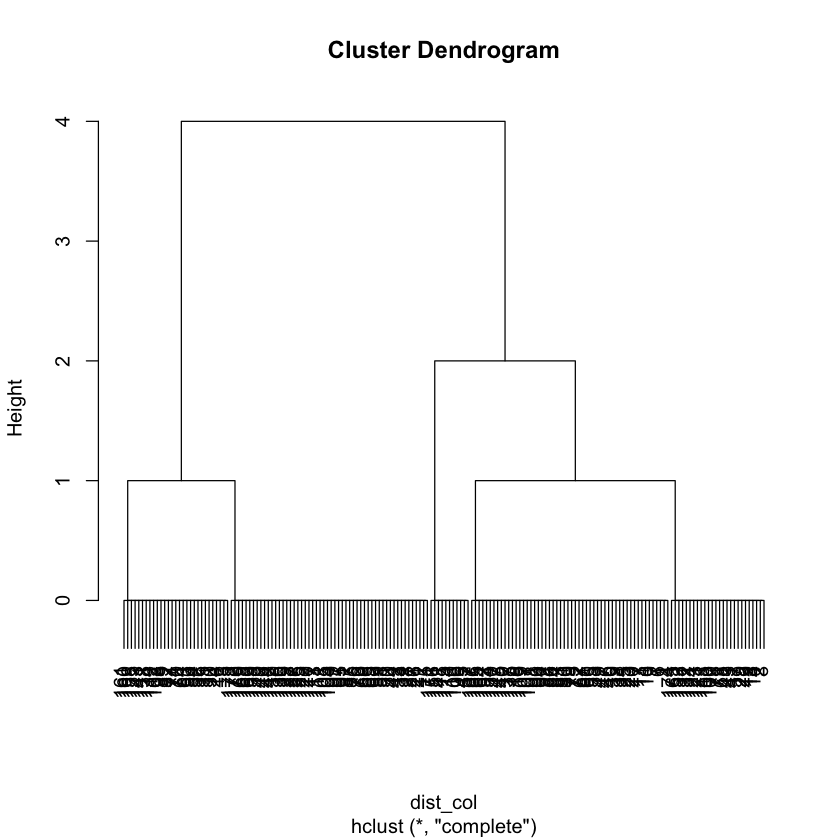

In [21]:
dist_col <- dist(as.numeric(meta_data[,'group']))
hc_col <- hclust(dist_col)
plot(hc_col)

## 'timeline' column
ADBio supports the time-course study as well as cohort study. If you have a 'timeline' column as shown in 'example_metadata_time.tsv', you can see the line chart across the time instead of a bar-typed.

## 'phylogeny' column
In case you have the phylogeny information about the samples of the meta-omics experiments, also you can add a ‘phylogeny’ column as shown in 'example_metadata_time.tsv'. It will let you have the phylogenetic tree in the pathway.

For this purpose, you need to upload a ‘phylogeny.nw’ file, which has a <a href="https://en.wikipedia.org/wiki/Newick_format">newick format</a> to contain the phylogenetic trees related to the biological samples, in your repository after creating a project. 